In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고가 뜨지 않도록..
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 출력 창 청소
from IPython.display import clear_output

import time


# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층 모델(은닉층과 출력층)
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
# 문자열을 숫자로 변환
from sklearn.preprocessing import LabelEncoder
# 원핫인코딩
from tensorflow.keras.utils import to_categorical

# 학습데이터와 검증데이터로 나눈다
from sklearn.model_selection import train_test_split

# K폴드 교차검증
from sklearn.model_selection import KFold

# 저장된 모델을 복원
from tensorflow.keras.models import load_model

# epoch 마다 저장하기 위해 사용
from tensorflow.keras.callbacks import ModelCheckpoint

# GPU 할당
gpus = tf.config.experimental.list_physical_devices('GPU')
# GPU가 있다면..
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)


In [2]:
# 랜덤 시드 설정
np.random.seed(1)
tf.random.set_seed(1)

In [3]:
df1 = pd.read_csv('data/wine.csv', header=None)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [4]:
# 입력과 결과로 나눈다.
X = df1.drop(12, axis=1)
y = df1[12]

display(X)
display(y)

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: 12, Length: 6497, dtype: int64

In [5]:
# 데이터 표준화 
scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)
X

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, ...,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.79795816,
        -0.58006813, -0.93722961],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -0.47897144,
        -0.91546416,  0.20799905],
       [-1.32319841, -0.30169391, -0.12823371, ..., -1.016626  ,
         1.9354021 ,  1.35322771],
       [-0.93749534, -0.78765037,  0.42232597, ..., -1.41986693,
         1.09691202,  0.20799905]])

In [6]:
# 모델 설정
model = Sequential()

a1 = X.shape[1]
model.add(Dense(30, input_dim=a1))
model.add(Activation('relu'))

model.add(Dense(12))
model.add(Activation('relu'))

model.add(Dense(8))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))


In [7]:
# 학습 모델을 생성한다
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=1)

In [9]:
# 학습한다.
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, 
          validation_data=[X_test, y_test])


Epoch 1/2000
11/11 [==============================] - 2s 20ms/step - loss: 0.6886 - accuracy: 0.5472 - val_loss: 0.6492 - val_accuracy: 0.7562
Epoch 2/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.6241 - accuracy: 0.8282 - val_loss: 0.5829 - val_accuracy: 0.9000
Epoch 3/2000
11/11 [==============================] - 0s 7ms/step - loss: 0.5573 - accuracy: 0.9024 - val_loss: 0.5093 - val_accuracy: 0.9231
Epoch 4/2000
11/11 [==============================] - 0s 7ms/step - loss: 0.4801 - accuracy: 0.9211 - val_loss: 0.4250 - val_accuracy: 0.9362
Epoch 5/2000
11/11 [==============================] - 0s 9ms/step - loss: 0.3937 - accuracy: 0.9440 - val_loss: 0.3367 - val_accuracy: 0.9538
Epoch 6/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.3072 - accuracy: 0.9636 - val_loss: 0.2548 - val_accuracy: 0.9638
Epoch 7/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.2291 - accuracy: 0.9740 - val_loss: 0.1887 - val_accuracy: 0.9777
Epoch

11/11 [==============================] - 0s 9ms/step - loss: 0.0153 - accuracy: 0.9971 - val_loss: 0.0320 - val_accuracy: 0.9938
Epoch 59/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0151 - accuracy: 0.9971 - val_loss: 0.0319 - val_accuracy: 0.9938
Epoch 60/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0149 - accuracy: 0.9971 - val_loss: 0.0319 - val_accuracy: 0.9938
Epoch 61/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0148 - accuracy: 0.9973 - val_loss: 0.0319 - val_accuracy: 0.9938
Epoch 62/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0147 - accuracy: 0.9973 - val_loss: 0.0316 - val_accuracy: 0.9938
Epoch 63/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0145 - accuracy: 0.9971 - val_loss: 0.0315 - val_accuracy: 0.9938
Epoch 64/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0144 - accuracy: 0.9971 - val_loss: 0.0314 - val_accuracy: 0.9938
Epoch 65/2000

Epoch 115/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0090 - accuracy: 0.9981 - val_loss: 0.0298 - val_accuracy: 0.9954
Epoch 116/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0090 - accuracy: 0.9981 - val_loss: 0.0297 - val_accuracy: 0.9954
Epoch 117/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0089 - accuracy: 0.9981 - val_loss: 0.0297 - val_accuracy: 0.9954
Epoch 118/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0088 - accuracy: 0.9981 - val_loss: 0.0297 - val_accuracy: 0.9954
Epoch 119/2000
11/11 [==============================] - 0s 9ms/step - loss: 0.0087 - accuracy: 0.9981 - val_loss: 0.0298 - val_accuracy: 0.9954
Epoch 120/2000
11/11 [==============================] - 0s 9ms/step - loss: 0.0087 - accuracy: 0.9981 - val_loss: 0.0297 - val_accuracy: 0.9954
Epoch 121/2000
11/11 [==============================] - 0s 9ms/step - loss: 0.0086 - accuracy: 0.9981 - val_loss: 0.0296 - val_accuracy:

Epoch 172/2000
11/11 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.9988 - val_loss: 0.0345 - val_accuracy: 0.9954
Epoch 173/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0058 - accuracy: 0.9985 - val_loss: 0.0347 - val_accuracy: 0.9954
Epoch 174/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.0349 - val_accuracy: 0.9954
Epoch 175/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0057 - accuracy: 0.9988 - val_loss: 0.0351 - val_accuracy: 0.9954
Epoch 176/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0056 - accuracy: 0.9988 - val_loss: 0.0351 - val_accuracy: 0.9954
Epoch 177/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0056 - accuracy: 0.9988 - val_loss: 0.0356 - val_accuracy: 0.9954
Epoch 178/2000
11/11 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.9988 - val_loss: 0.0357 - val_accuracy:

11/11 [==============================] - 0s 8ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0451 - val_accuracy: 0.9954
Epoch 229/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0457 - val_accuracy: 0.9954
Epoch 230/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0459 - val_accuracy: 0.9954
Epoch 231/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0461 - val_accuracy: 0.9954
Epoch 232/2000
11/11 [==============================] - 0s 9ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0461 - val_accuracy: 0.9954
Epoch 233/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0462 - val_accuracy: 0.9954
Epoch 234/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0469 - val_accuracy: 0.9954
Epoch 2

Epoch 285/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0582 - val_accuracy: 0.9962
Epoch 286/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0583 - val_accuracy: 0.9962
Epoch 287/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0587 - val_accuracy: 0.9962
Epoch 288/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0592 - val_accuracy: 0.9962
Epoch 289/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0595 - val_accuracy: 0.9962
Epoch 290/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0010 - accuracy: 0.9996 - val_loss: 0.0599 - val_accuracy: 0.9962
Epoch 291/2000
11/11 [==============================] - 0s 9ms/step - loss: 9.9261e-04 - accuracy: 0.9996 - val_loss: 0.0600 - val_accur

11/11 [==============================] - 0s 9ms/step - loss: 1.8786e-04 - accuracy: 1.0000 - val_loss: 0.0701 - val_accuracy: 0.9954
Epoch 341/2000
11/11 [==============================] - 0s 9ms/step - loss: 1.8444e-04 - accuracy: 1.0000 - val_loss: 0.0704 - val_accuracy: 0.9954
Epoch 342/2000
11/11 [==============================] - 0s 8ms/step - loss: 1.8063e-04 - accuracy: 1.0000 - val_loss: 0.0705 - val_accuracy: 0.9954
Epoch 343/2000
11/11 [==============================] - 0s 8ms/step - loss: 1.7737e-04 - accuracy: 1.0000 - val_loss: 0.0706 - val_accuracy: 0.9954
Epoch 344/2000
11/11 [==============================] - 0s 8ms/step - loss: 1.7373e-04 - accuracy: 1.0000 - val_loss: 0.0706 - val_accuracy: 0.9954
Epoch 345/2000
11/11 [==============================] - 0s 9ms/step - loss: 1.6747e-04 - accuracy: 1.0000 - val_loss: 0.0708 - val_accuracy: 0.9954
Epoch 346/2000
11/11 [==============================] - 0s 8ms/step - loss: 1.6579e-04 - accuracy: 1.0000 - val_loss: 0.0709 - 

11/11 [==============================] - 0s 8ms/step - loss: 7.0289e-05 - accuracy: 1.0000 - val_loss: 0.0769 - val_accuracy: 0.9954
Epoch 396/2000
11/11 [==============================] - 0s 8ms/step - loss: 6.8713e-05 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.9954
Epoch 397/2000
11/11 [==============================] - 0s 8ms/step - loss: 6.8077e-05 - accuracy: 1.0000 - val_loss: 0.0772 - val_accuracy: 0.9954
Epoch 398/2000
11/11 [==============================] - 0s 8ms/step - loss: 6.7285e-05 - accuracy: 1.0000 - val_loss: 0.0774 - val_accuracy: 0.9954
Epoch 399/2000
11/11 [==============================] - 0s 8ms/step - loss: 6.6624e-05 - accuracy: 1.0000 - val_loss: 0.0775 - val_accuracy: 0.9954
Epoch 400/2000
11/11 [==============================] - 0s 8ms/step - loss: 6.5050e-05 - accuracy: 1.0000 - val_loss: 0.0774 - val_accuracy: 0.9954
Epoch 401/2000
11/11 [==============================] - 0s 8ms/step - loss: 6.4302e-05 - accuracy: 1.0000 - val_loss: 0.0774 - 

Epoch 450/2000
11/11 [==============================] - 0s 8ms/step - loss: 3.4724e-05 - accuracy: 1.0000 - val_loss: 0.0826 - val_accuracy: 0.9954
Epoch 451/2000
11/11 [==============================] - 0s 8ms/step - loss: 3.4306e-05 - accuracy: 1.0000 - val_loss: 0.0827 - val_accuracy: 0.9954
Epoch 452/2000
11/11 [==============================] - 0s 8ms/step - loss: 3.4383e-05 - accuracy: 1.0000 - val_loss: 0.0827 - val_accuracy: 0.9954
Epoch 453/2000
11/11 [==============================] - ETA: 0s - loss: 3.3655e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 3.3655e-05 - accuracy: 1.0000 - val_loss: 0.0828 - val_accuracy: 0.9954
Epoch 454/2000
11/11 [==============================] - 0s 8ms/step - loss: 3.3487e-05 - accuracy: 1.0000 - val_loss: 0.0829 - val_accuracy: 0.9954
Epoch 455/2000
11/11 [==============================] - 0s 9ms/step - loss: 3.3424e-05 - accuracy: 1.0000 - val_loss: 0.0830 - val_accuracy: 0.9954
Epoch 456/2000
11/11 [==============================] - 0s 8ms/ste

11/11 [==============================] - 0s 8ms/step - loss: 1.9429e-05 - accuracy: 1.0000 - val_loss: 0.0873 - val_accuracy: 0.9954
Epoch 506/2000
11/11 [==============================] - 0s 8ms/step - loss: 1.9252e-05 - accuracy: 1.0000 - val_loss: 0.0875 - val_accuracy: 0.9954
Epoch 507/2000
11/11 [==============================] - 0s 8ms/step - loss: 1.9112e-05 - accuracy: 1.0000 - val_loss: 0.0875 - val_accuracy: 0.9954
Epoch 508/2000
11/11 [==============================] - 0s 8ms/step - loss: 1.8850e-05 - accuracy: 1.0000 - val_loss: 0.0876 - val_accuracy: 0.9954
Epoch 509/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.8717e-05 - accuracy: 1.0000 - val_loss: 0.0877 - val_accuracy: 0.9954
Epoch 510/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.8513e-05 - accuracy: 1.0000 - val_loss: 0.0878 - val_accuracy: 0.9954
Epoch 511/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.8443e-05 - accuracy: 1.0000 - val_loss: 0.0878 - 

11/11 [==============================] - 0s 7ms/step - loss: 1.1595e-05 - accuracy: 1.0000 - val_loss: 0.0916 - val_accuracy: 0.9954
Epoch 561/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.1498e-05 - accuracy: 1.0000 - val_loss: 0.0917 - val_accuracy: 0.9954
Epoch 562/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.1311e-05 - accuracy: 1.0000 - val_loss: 0.0919 - val_accuracy: 0.9954
Epoch 563/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.1277e-05 - accuracy: 1.0000 - val_loss: 0.0920 - val_accuracy: 0.9954
Epoch 564/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.1160e-05 - accuracy: 1.0000 - val_loss: 0.0922 - val_accuracy: 0.9954
Epoch 565/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.1054e-05 - accuracy: 1.0000 - val_loss: 0.0922 - val_accuracy: 0.9954
Epoch 566/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.0924e-05 - accuracy: 1.0000 - val_loss: 0.0924 - 

11/11 [==============================] - 0s 7ms/step - loss: 7.1987e-06 - accuracy: 1.0000 - val_loss: 0.0959 - val_accuracy: 0.9954
Epoch 616/2000
11/11 [==============================] - 0s 7ms/step - loss: 7.0973e-06 - accuracy: 1.0000 - val_loss: 0.0960 - val_accuracy: 0.9954
Epoch 617/2000
11/11 [==============================] - 0s 7ms/step - loss: 7.1320e-06 - accuracy: 1.0000 - val_loss: 0.0960 - val_accuracy: 0.9954
Epoch 618/2000
11/11 [==============================] - 0s 7ms/step - loss: 7.0243e-06 - accuracy: 1.0000 - val_loss: 0.0962 - val_accuracy: 0.9954
Epoch 619/2000
11/11 [==============================] - 0s 7ms/step - loss: 6.9487e-06 - accuracy: 1.0000 - val_loss: 0.0962 - val_accuracy: 0.9954
Epoch 620/2000
11/11 [==============================] - 0s 7ms/step - loss: 6.8897e-06 - accuracy: 1.0000 - val_loss: 0.0963 - val_accuracy: 0.9954
Epoch 621/2000
11/11 [==============================] - 0s 7ms/step - loss: 6.8056e-06 - accuracy: 1.0000 - val_loss: 0.0963 - 

11/11 [==============================] - 0s 7ms/step - loss: 4.5845e-06 - accuracy: 1.0000 - val_loss: 0.1000 - val_accuracy: 0.9946
Epoch 671/2000
11/11 [==============================] - 0s 7ms/step - loss: 4.5490e-06 - accuracy: 1.0000 - val_loss: 0.1001 - val_accuracy: 0.9946
Epoch 672/2000
11/11 [==============================] - 0s 7ms/step - loss: 4.5237e-06 - accuracy: 1.0000 - val_loss: 0.1002 - val_accuracy: 0.9946
Epoch 673/2000
11/11 [==============================] - 0s 7ms/step - loss: 4.4953e-06 - accuracy: 1.0000 - val_loss: 0.1003 - val_accuracy: 0.9946
Epoch 674/2000
11/11 [==============================] - 0s 7ms/step - loss: 4.4358e-06 - accuracy: 1.0000 - val_loss: 0.1003 - val_accuracy: 0.9946
Epoch 675/2000
11/11 [==============================] - 0s 7ms/step - loss: 4.4366e-06 - accuracy: 1.0000 - val_loss: 0.1003 - val_accuracy: 0.9946
Epoch 676/2000
11/11 [==============================] - 0s 7ms/step - loss: 4.3882e-06 - accuracy: 1.0000 - val_loss: 0.1004 - 

11/11 [==============================] - 0s 7ms/step - loss: 3.0325e-06 - accuracy: 1.0000 - val_loss: 0.1039 - val_accuracy: 0.9946
Epoch 726/2000
11/11 [==============================] - 0s 7ms/step - loss: 3.0093e-06 - accuracy: 1.0000 - val_loss: 0.1040 - val_accuracy: 0.9946
Epoch 727/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.9862e-06 - accuracy: 1.0000 - val_loss: 0.1040 - val_accuracy: 0.9946
Epoch 728/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.9518e-06 - accuracy: 1.0000 - val_loss: 0.1041 - val_accuracy: 0.9946
Epoch 729/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.9394e-06 - accuracy: 1.0000 - val_loss: 0.1041 - val_accuracy: 0.9946
Epoch 730/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.9117e-06 - accuracy: 1.0000 - val_loss: 0.1042 - val_accuracy: 0.9946
Epoch 731/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.8937e-06 - accuracy: 1.0000 - val_loss: 0.1043 - 

11/11 [==============================] - 0s 7ms/step - loss: 2.0183e-06 - accuracy: 1.0000 - val_loss: 0.1075 - val_accuracy: 0.9946
Epoch 781/2000
11/11 [==============================] - 0s 6ms/step - loss: 2.0304e-06 - accuracy: 1.0000 - val_loss: 0.1076 - val_accuracy: 0.9946
Epoch 782/2000
11/11 [==============================] - 0s 6ms/step - loss: 2.0344e-06 - accuracy: 1.0000 - val_loss: 0.1077 - val_accuracy: 0.9946
Epoch 783/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.9853e-06 - accuracy: 1.0000 - val_loss: 0.1078 - val_accuracy: 0.9946
Epoch 784/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.9613e-06 - accuracy: 1.0000 - val_loss: 0.1078 - val_accuracy: 0.9946
Epoch 785/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.9566e-06 - accuracy: 1.0000 - val_loss: 0.1079 - val_accuracy: 0.9946
Epoch 786/2000
11/11 [==============================] - 0s 6ms/step - loss: 1.9267e-06 - accuracy: 1.0000 - val_loss: 0.1079 - 

11/11 [==============================] - 0s 7ms/step - loss: 1.3350e-06 - accuracy: 1.0000 - val_loss: 0.1114 - val_accuracy: 0.9946
Epoch 836/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.3229e-06 - accuracy: 1.0000 - val_loss: 0.1114 - val_accuracy: 0.9946
Epoch 837/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.3114e-06 - accuracy: 1.0000 - val_loss: 0.1115 - val_accuracy: 0.9946
Epoch 838/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.3041e-06 - accuracy: 1.0000 - val_loss: 0.1116 - val_accuracy: 0.9946
Epoch 839/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.2968e-06 - accuracy: 1.0000 - val_loss: 0.1116 - val_accuracy: 0.9946
Epoch 840/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.2876e-06 - accuracy: 1.0000 - val_loss: 0.1117 - val_accuracy: 0.9946
Epoch 841/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.2861e-06 - accuracy: 1.0000 - val_loss: 0.1117 - 

11/11 [==============================] - 0s 7ms/step - loss: 9.1963e-07 - accuracy: 1.0000 - val_loss: 0.1149 - val_accuracy: 0.9946
Epoch 891/2000
11/11 [==============================] - 0s 7ms/step - loss: 9.0349e-07 - accuracy: 1.0000 - val_loss: 0.1150 - val_accuracy: 0.9946
Epoch 892/2000
11/11 [==============================] - 0s 7ms/step - loss: 9.0117e-07 - accuracy: 1.0000 - val_loss: 0.1151 - val_accuracy: 0.9946
Epoch 893/2000
11/11 [==============================] - 0s 6ms/step - loss: 8.9188e-07 - accuracy: 1.0000 - val_loss: 0.1151 - val_accuracy: 0.9946
Epoch 894/2000
11/11 [==============================] - 0s 7ms/step - loss: 8.9850e-07 - accuracy: 1.0000 - val_loss: 0.1151 - val_accuracy: 0.9946
Epoch 895/2000
11/11 [==============================] - 0s 7ms/step - loss: 8.9179e-07 - accuracy: 1.0000 - val_loss: 0.1153 - val_accuracy: 0.9946
Epoch 896/2000
11/11 [==============================] - 0s 7ms/step - loss: 8.7676e-07 - accuracy: 1.0000 - val_loss: 0.1153 - 

11/11 [==============================] - 0s 7ms/step - loss: 6.2487e-07 - accuracy: 1.0000 - val_loss: 0.1187 - val_accuracy: 0.9946
Epoch 946/2000
11/11 [==============================] - 0s 7ms/step - loss: 6.2118e-07 - accuracy: 1.0000 - val_loss: 0.1187 - val_accuracy: 0.9946
Epoch 947/2000
11/11 [==============================] - 0s 7ms/step - loss: 6.1732e-07 - accuracy: 1.0000 - val_loss: 0.1188 - val_accuracy: 0.9946
Epoch 948/2000
11/11 [==============================] - 0s 7ms/step - loss: 6.1264e-07 - accuracy: 1.0000 - val_loss: 0.1189 - val_accuracy: 0.9946
Epoch 949/2000
11/11 [==============================] - 0s 7ms/step - loss: 6.0731e-07 - accuracy: 1.0000 - val_loss: 0.1189 - val_accuracy: 0.9946
Epoch 950/2000
11/11 [==============================] - 0s 7ms/step - loss: 6.0423e-07 - accuracy: 1.0000 - val_loss: 0.1190 - val_accuracy: 0.9946
Epoch 951/2000
11/11 [==============================] - 0s 7ms/step - loss: 6.0207e-07 - accuracy: 1.0000 - val_loss: 0.1191 - 

11/11 [==============================] - 0s 7ms/step - loss: 4.3531e-07 - accuracy: 1.0000 - val_loss: 0.1222 - val_accuracy: 0.9946
Epoch 1001/2000
11/11 [==============================] - 0s 7ms/step - loss: 4.3154e-07 - accuracy: 1.0000 - val_loss: 0.1223 - val_accuracy: 0.9946
Epoch 1002/2000
11/11 [==============================] - 0s 7ms/step - loss: 4.2805e-07 - accuracy: 1.0000 - val_loss: 0.1224 - val_accuracy: 0.9946
Epoch 1003/2000
11/11 [==============================] - 0s 7ms/step - loss: 4.2688e-07 - accuracy: 1.0000 - val_loss: 0.1224 - val_accuracy: 0.9946
Epoch 1004/2000
11/11 [==============================] - 0s 7ms/step - loss: 4.2599e-07 - accuracy: 1.0000 - val_loss: 0.1224 - val_accuracy: 0.9946
Epoch 1005/2000
11/11 [==============================] - 0s 7ms/step - loss: 4.1898e-07 - accuracy: 1.0000 - val_loss: 0.1225 - val_accuracy: 0.9946
Epoch 1006/2000
11/11 [==============================] - 0s 7ms/step - loss: 4.1634e-07 - accuracy: 1.0000 - val_loss: 0.1

11/11 [==============================] - 0s 7ms/step - loss: 3.0219e-07 - accuracy: 1.0000 - val_loss: 0.1256 - val_accuracy: 0.9946
Epoch 1056/2000
11/11 [==============================] - 0s 7ms/step - loss: 3.0089e-07 - accuracy: 1.0000 - val_loss: 0.1257 - val_accuracy: 0.9946
Epoch 1057/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.9896e-07 - accuracy: 1.0000 - val_loss: 0.1258 - val_accuracy: 0.9946
Epoch 1058/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.9648e-07 - accuracy: 1.0000 - val_loss: 0.1258 - val_accuracy: 0.9946
Epoch 1059/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.9458e-07 - accuracy: 1.0000 - val_loss: 0.1258 - val_accuracy: 0.9946
Epoch 1060/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.9367e-07 - accuracy: 1.0000 - val_loss: 0.1259 - val_accuracy: 0.9946
Epoch 1061/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.9213e-07 - accuracy: 1.0000 - val_loss: 0.1

11/11 [==============================] - 0s 8ms/step - loss: 2.1248e-07 - accuracy: 1.0000 - val_loss: 0.1292 - val_accuracy: 0.9946
Epoch 1111/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.1118e-07 - accuracy: 1.0000 - val_loss: 0.1292 - val_accuracy: 0.9946
Epoch 1112/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.1029e-07 - accuracy: 1.0000 - val_loss: 0.1292 - val_accuracy: 0.9946
Epoch 1113/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.0879e-07 - accuracy: 1.0000 - val_loss: 0.1293 - val_accuracy: 0.9946
Epoch 1114/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.0736e-07 - accuracy: 1.0000 - val_loss: 0.1293 - val_accuracy: 0.9946
Epoch 1115/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.0740e-07 - accuracy: 1.0000 - val_loss: 0.1295 - val_accuracy: 0.9946
Epoch 1116/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.0525e-07 - accuracy: 1.0000 - val_loss: 0.1

11/11 [==============================] - 0s 7ms/step - loss: 1.5036e-07 - accuracy: 1.0000 - val_loss: 0.1326 - val_accuracy: 0.9946
Epoch 1166/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.4881e-07 - accuracy: 1.0000 - val_loss: 0.1327 - val_accuracy: 0.9946
Epoch 1167/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.4761e-07 - accuracy: 1.0000 - val_loss: 0.1328 - val_accuracy: 0.9946
Epoch 1168/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.4674e-07 - accuracy: 1.0000 - val_loss: 0.1328 - val_accuracy: 0.9946
Epoch 1169/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.4622e-07 - accuracy: 1.0000 - val_loss: 0.1328 - val_accuracy: 0.9946
Epoch 1170/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.4506e-07 - accuracy: 1.0000 - val_loss: 0.1329 - val_accuracy: 0.9946
Epoch 1171/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.4413e-07 - accuracy: 1.0000 - val_loss: 0.1

11/11 [==============================] - 0s 7ms/step - loss: 1.0650e-07 - accuracy: 1.0000 - val_loss: 0.1359 - val_accuracy: 0.9946
Epoch 1221/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.0566e-07 - accuracy: 1.0000 - val_loss: 0.1360 - val_accuracy: 0.9946
Epoch 1222/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.0592e-07 - accuracy: 1.0000 - val_loss: 0.1360 - val_accuracy: 0.9946
Epoch 1223/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.0455e-07 - accuracy: 1.0000 - val_loss: 0.1362 - val_accuracy: 0.9946
Epoch 1224/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.0424e-07 - accuracy: 1.0000 - val_loss: 0.1363 - val_accuracy: 0.9946
Epoch 1225/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.0330e-07 - accuracy: 1.0000 - val_loss: 0.1363 - val_accuracy: 0.9946
Epoch 1226/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.0247e-07 - accuracy: 1.0000 - val_loss: 0.1

11/11 [==============================] - 0s 7ms/step - loss: 7.5919e-08 - accuracy: 1.0000 - val_loss: 0.1393 - val_accuracy: 0.9946
Epoch 1276/2000
11/11 [==============================] - 0s 7ms/step - loss: 7.5063e-08 - accuracy: 1.0000 - val_loss: 0.1393 - val_accuracy: 0.9946
Epoch 1277/2000
11/11 [==============================] - 0s 6ms/step - loss: 7.4746e-08 - accuracy: 1.0000 - val_loss: 0.1394 - val_accuracy: 0.9946
Epoch 1278/2000
11/11 [==============================] - 0s 7ms/step - loss: 7.4229e-08 - accuracy: 1.0000 - val_loss: 0.1395 - val_accuracy: 0.9946
Epoch 1279/2000
11/11 [==============================] - 0s 7ms/step - loss: 7.3633e-08 - accuracy: 1.0000 - val_loss: 0.1396 - val_accuracy: 0.9946
Epoch 1280/2000
11/11 [==============================] - 0s 7ms/step - loss: 7.3452e-08 - accuracy: 1.0000 - val_loss: 0.1396 - val_accuracy: 0.9946
Epoch 1281/2000
11/11 [==============================] - 0s 7ms/step - loss: 7.3399e-08 - accuracy: 1.0000 - val_loss: 0.1

11/11 [==============================] - 0s 7ms/step - loss: 5.3835e-08 - accuracy: 1.0000 - val_loss: 0.1425 - val_accuracy: 0.9946
Epoch 1331/2000
11/11 [==============================] - 0s 7ms/step - loss: 5.3456e-08 - accuracy: 1.0000 - val_loss: 0.1426 - val_accuracy: 0.9946
Epoch 1332/2000
11/11 [==============================] - 0s 7ms/step - loss: 5.3405e-08 - accuracy: 1.0000 - val_loss: 0.1426 - val_accuracy: 0.9946
Epoch 1333/2000
11/11 [==============================] - 0s 7ms/step - loss: 5.2898e-08 - accuracy: 1.0000 - val_loss: 0.1427 - val_accuracy: 0.9946
Epoch 1334/2000
11/11 [==============================] - 0s 7ms/step - loss: 5.2521e-08 - accuracy: 1.0000 - val_loss: 0.1428 - val_accuracy: 0.9946
Epoch 1335/2000
11/11 [==============================] - 0s 7ms/step - loss: 5.2028e-08 - accuracy: 1.0000 - val_loss: 0.1428 - val_accuracy: 0.9946
Epoch 1336/2000
11/11 [==============================] - 0s 7ms/step - loss: 5.1818e-08 - accuracy: 1.0000 - val_loss: 0.1

11/11 [==============================] - 0s 7ms/step - loss: 3.8814e-08 - accuracy: 1.0000 - val_loss: 0.1456 - val_accuracy: 0.9946
Epoch 1386/2000
11/11 [==============================] - 0s 7ms/step - loss: 3.8616e-08 - accuracy: 1.0000 - val_loss: 0.1458 - val_accuracy: 0.9946
Epoch 1387/2000
11/11 [==============================] - 0s 7ms/step - loss: 3.8669e-08 - accuracy: 1.0000 - val_loss: 0.1458 - val_accuracy: 0.9946
Epoch 1388/2000
11/11 [==============================] - 0s 7ms/step - loss: 3.8247e-08 - accuracy: 1.0000 - val_loss: 0.1458 - val_accuracy: 0.9946
Epoch 1389/2000
11/11 [==============================] - 0s 7ms/step - loss: 3.7791e-08 - accuracy: 1.0000 - val_loss: 0.1459 - val_accuracy: 0.9946
Epoch 1390/2000
11/11 [==============================] - 0s 7ms/step - loss: 3.7502e-08 - accuracy: 1.0000 - val_loss: 0.1459 - val_accuracy: 0.9946
Epoch 1391/2000
11/11 [==============================] - 0s 7ms/step - loss: 3.7252e-08 - accuracy: 1.0000 - val_loss: 0.1

11/11 [==============================] - 0s 7ms/step - loss: 2.7971e-08 - accuracy: 1.0000 - val_loss: 0.1487 - val_accuracy: 0.9946
Epoch 1441/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.7640e-08 - accuracy: 1.0000 - val_loss: 0.1487 - val_accuracy: 0.9946
Epoch 1442/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.7325e-08 - accuracy: 1.0000 - val_loss: 0.1487 - val_accuracy: 0.9946
Epoch 1443/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.7221e-08 - accuracy: 1.0000 - val_loss: 0.1488 - val_accuracy: 0.9946
Epoch 1444/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.7023e-08 - accuracy: 1.0000 - val_loss: 0.1488 - val_accuracy: 0.9946
Epoch 1445/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.6881e-08 - accuracy: 1.0000 - val_loss: 0.1488 - val_accuracy: 0.9946
Epoch 1446/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.6793e-08 - accuracy: 1.0000 - val_loss: 0.1

11/11 [==============================] - 0s 7ms/step - loss: 1.9966e-08 - accuracy: 1.0000 - val_loss: 0.1516 - val_accuracy: 0.9946
Epoch 1496/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.9935e-08 - accuracy: 1.0000 - val_loss: 0.1516 - val_accuracy: 0.9946
Epoch 1497/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.9741e-08 - accuracy: 1.0000 - val_loss: 0.1517 - val_accuracy: 0.9946
Epoch 1498/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.9611e-08 - accuracy: 1.0000 - val_loss: 0.1517 - val_accuracy: 0.9946
Epoch 1499/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.9534e-08 - accuracy: 1.0000 - val_loss: 0.1517 - val_accuracy: 0.9946
Epoch 1500/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.9447e-08 - accuracy: 1.0000 - val_loss: 0.1518 - val_accuracy: 0.9946
Epoch 1501/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.9407e-08 - accuracy: 1.0000 - val_loss: 0.1

11/11 [==============================] - 0s 7ms/step - loss: 1.4572e-08 - accuracy: 1.0000 - val_loss: 0.1545 - val_accuracy: 0.9946
Epoch 1551/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.4487e-08 - accuracy: 1.0000 - val_loss: 0.1545 - val_accuracy: 0.9946
Epoch 1552/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.4459e-08 - accuracy: 1.0000 - val_loss: 0.1546 - val_accuracy: 0.9946
Epoch 1553/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.4348e-08 - accuracy: 1.0000 - val_loss: 0.1546 - val_accuracy: 0.9946
Epoch 1554/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.4284e-08 - accuracy: 1.0000 - val_loss: 0.1546 - val_accuracy: 0.9946
Epoch 1555/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.4202e-08 - accuracy: 1.0000 - val_loss: 0.1547 - val_accuracy: 0.9946
Epoch 1556/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.4207e-08 - accuracy: 1.0000 - val_loss: 0.1

11/11 [==============================] - 0s 7ms/step - loss: 1.0713e-08 - accuracy: 1.0000 - val_loss: 0.1572 - val_accuracy: 0.9946
Epoch 1606/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.0657e-08 - accuracy: 1.0000 - val_loss: 0.1572 - val_accuracy: 0.9946
Epoch 1607/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.0616e-08 - accuracy: 1.0000 - val_loss: 0.1574 - val_accuracy: 0.9946
Epoch 1608/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.0504e-08 - accuracy: 1.0000 - val_loss: 0.1574 - val_accuracy: 0.9946
Epoch 1609/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.0495e-08 - accuracy: 1.0000 - val_loss: 0.1574 - val_accuracy: 0.9946
Epoch 1610/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.0563e-08 - accuracy: 1.0000 - val_loss: 0.1575 - val_accuracy: 0.9946
Epoch 1611/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.0449e-08 - accuracy: 1.0000 - val_loss: 0.1

11/11 [==============================] - 0s 7ms/step - loss: 7.8074e-09 - accuracy: 1.0000 - val_loss: 0.1605 - val_accuracy: 0.9946
Epoch 1661/2000
11/11 [==============================] - 0s 7ms/step - loss: 7.7571e-09 - accuracy: 1.0000 - val_loss: 0.1605 - val_accuracy: 0.9946
Epoch 1662/2000
11/11 [==============================] - 0s 7ms/step - loss: 7.6832e-09 - accuracy: 1.0000 - val_loss: 0.1606 - val_accuracy: 0.9946
Epoch 1663/2000
11/11 [==============================] - 0s 7ms/step - loss: 7.6648e-09 - accuracy: 1.0000 - val_loss: 0.1607 - val_accuracy: 0.9946
Epoch 1664/2000
11/11 [==============================] - 0s 7ms/step - loss: 7.5914e-09 - accuracy: 1.0000 - val_loss: 0.1607 - val_accuracy: 0.9946
Epoch 1665/2000
11/11 [==============================] - 0s 7ms/step - loss: 7.5680e-09 - accuracy: 1.0000 - val_loss: 0.1608 - val_accuracy: 0.9946
Epoch 1666/2000
11/11 [==============================] - 0s 7ms/step - loss: 7.5435e-09 - accuracy: 1.0000 - val_loss: 0.1

11/11 [==============================] - 0s 7ms/step - loss: 5.7346e-09 - accuracy: 1.0000 - val_loss: 0.1633 - val_accuracy: 0.9946
Epoch 1716/2000
11/11 [==============================] - 0s 7ms/step - loss: 5.7231e-09 - accuracy: 1.0000 - val_loss: 0.1633 - val_accuracy: 0.9946
Epoch 1717/2000
11/11 [==============================] - 0s 7ms/step - loss: 5.7066e-09 - accuracy: 1.0000 - val_loss: 0.1634 - val_accuracy: 0.9946
Epoch 1718/2000
11/11 [==============================] - 0s 7ms/step - loss: 5.6515e-09 - accuracy: 1.0000 - val_loss: 0.1635 - val_accuracy: 0.9946
Epoch 1719/2000
11/11 [==============================] - 0s 7ms/step - loss: 5.6360e-09 - accuracy: 1.0000 - val_loss: 0.1635 - val_accuracy: 0.9946
Epoch 1720/2000
11/11 [==============================] - 0s 7ms/step - loss: 5.5920e-09 - accuracy: 1.0000 - val_loss: 0.1635 - val_accuracy: 0.9946
Epoch 1721/2000
11/11 [==============================] - 0s 7ms/step - loss: 5.5799e-09 - accuracy: 1.0000 - val_loss: 0.1

11/11 [==============================] - 0s 7ms/step - loss: 4.3091e-09 - accuracy: 1.0000 - val_loss: 0.1659 - val_accuracy: 0.9946
Epoch 1771/2000
11/11 [==============================] - 0s 7ms/step - loss: 4.2793e-09 - accuracy: 1.0000 - val_loss: 0.1660 - val_accuracy: 0.9946
Epoch 1772/2000
11/11 [==============================] - 0s 7ms/step - loss: 4.2453e-09 - accuracy: 1.0000 - val_loss: 0.1660 - val_accuracy: 0.9946
Epoch 1773/2000
11/11 [==============================] - 0s 7ms/step - loss: 4.2447e-09 - accuracy: 1.0000 - val_loss: 0.1660 - val_accuracy: 0.9946
Epoch 1774/2000
11/11 [==============================] - 0s 7ms/step - loss: 4.2222e-09 - accuracy: 1.0000 - val_loss: 0.1661 - val_accuracy: 0.9946
Epoch 1775/2000
11/11 [==============================] - 0s 7ms/step - loss: 4.1723e-09 - accuracy: 1.0000 - val_loss: 0.1661 - val_accuracy: 0.9946
Epoch 1776/2000
11/11 [==============================] - 0s 7ms/step - loss: 4.1890e-09 - accuracy: 1.0000 - val_loss: 0.1

11/11 [==============================] - 0s 7ms/step - loss: 3.2620e-09 - accuracy: 1.0000 - val_loss: 0.1684 - val_accuracy: 0.9946
Epoch 1826/2000
11/11 [==============================] - 0s 7ms/step - loss: 3.2661e-09 - accuracy: 1.0000 - val_loss: 0.1684 - val_accuracy: 0.9946
Epoch 1827/2000
11/11 [==============================] - 0s 7ms/step - loss: 3.2499e-09 - accuracy: 1.0000 - val_loss: 0.1685 - val_accuracy: 0.9946
Epoch 1828/2000
11/11 [==============================] - 0s 7ms/step - loss: 3.2182e-09 - accuracy: 1.0000 - val_loss: 0.1686 - val_accuracy: 0.9946
Epoch 1829/2000
11/11 [==============================] - 0s 7ms/step - loss: 3.2299e-09 - accuracy: 1.0000 - val_loss: 0.1686 - val_accuracy: 0.9946
Epoch 1830/2000
11/11 [==============================] - 0s 7ms/step - loss: 3.2067e-09 - accuracy: 1.0000 - val_loss: 0.1687 - val_accuracy: 0.9946
Epoch 1831/2000
11/11 [==============================] - 0s 7ms/step - loss: 3.2252e-09 - accuracy: 1.0000 - val_loss: 0.1

11/11 [==============================] - 0s 7ms/step - loss: 2.5245e-09 - accuracy: 1.0000 - val_loss: 0.1706 - val_accuracy: 0.9946
Epoch 1881/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.5172e-09 - accuracy: 1.0000 - val_loss: 0.1706 - val_accuracy: 0.9946
Epoch 1882/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.5015e-09 - accuracy: 1.0000 - val_loss: 0.1706 - val_accuracy: 0.9946
Epoch 1883/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.4974e-09 - accuracy: 1.0000 - val_loss: 0.1707 - val_accuracy: 0.9946
Epoch 1884/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.4837e-09 - accuracy: 1.0000 - val_loss: 0.1707 - val_accuracy: 0.9946
Epoch 1885/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.4732e-09 - accuracy: 1.0000 - val_loss: 0.1707 - val_accuracy: 0.9946
Epoch 1886/2000
11/11 [==============================] - 0s 7ms/step - loss: 2.4578e-09 - accuracy: 1.0000 - val_loss: 0.1

11/11 [==============================] - 0s 7ms/step - loss: 1.9899e-09 - accuracy: 1.0000 - val_loss: 0.1726 - val_accuracy: 0.9946
Epoch 1936/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.9832e-09 - accuracy: 1.0000 - val_loss: 0.1726 - val_accuracy: 0.9946
Epoch 1937/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.9863e-09 - accuracy: 1.0000 - val_loss: 0.1725 - val_accuracy: 0.9946
Epoch 1938/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.9702e-09 - accuracy: 1.0000 - val_loss: 0.1726 - val_accuracy: 0.9946
Epoch 1939/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.9604e-09 - accuracy: 1.0000 - val_loss: 0.1726 - val_accuracy: 0.9946
Epoch 1940/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.9508e-09 - accuracy: 1.0000 - val_loss: 0.1727 - val_accuracy: 0.9946
Epoch 1941/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.9466e-09 - accuracy: 1.0000 - val_loss: 0.1

11/11 [==============================] - 0s 6ms/step - loss: 1.5988e-09 - accuracy: 1.0000 - val_loss: 0.1747 - val_accuracy: 0.9946
Epoch 1991/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.5918e-09 - accuracy: 1.0000 - val_loss: 0.1747 - val_accuracy: 0.9946
Epoch 1992/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.5866e-09 - accuracy: 1.0000 - val_loss: 0.1748 - val_accuracy: 0.9946
Epoch 1993/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.5866e-09 - accuracy: 1.0000 - val_loss: 0.1748 - val_accuracy: 0.9946
Epoch 1994/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.5906e-09 - accuracy: 1.0000 - val_loss: 0.1747 - val_accuracy: 0.9946
Epoch 1995/2000
11/11 [==============================] - 0s 7ms/step - loss: 1.5766e-09 - accuracy: 1.0000 - val_loss: 0.1747 - val_accuracy: 0.9946
Epoch 1996/2000
11/11 [==============================] - 0s 6ms/step - loss: 1.5663e-09 - accuracy: 1.0000 - val_loss: 0.1

In [11]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [12]:
history.history

{'loss': [0.6886323094367981,
  0.6240677833557129,
  0.5572752356529236,
  0.4801446497440338,
  0.39367765188217163,
  0.30716219544410706,
  0.2290572226047516,
  0.16766822338104248,
  0.12396892160177231,
  0.0942067950963974,
  0.07500426471233368,
  0.0621844120323658,
  0.05365336686372757,
  0.047483377158641815,
  0.043036334216594696,
  0.03945731744170189,
  0.03674779459834099,
  0.03453901410102844,
  0.03268467262387276,
  0.031117068603634834,
  0.029675139114260674,
  0.028540808707475662,
  0.027434904128313065,
  0.02652723900973797,
  0.025691460818052292,
  0.02495945617556572,
  0.024258127436041832,
  0.023661980405449867,
  0.023111948743462563,
  0.022557303309440613,
  0.022061849012970924,
  0.021597545593976974,
  0.02116003818809986,
  0.020774219185113907,
  0.0204069372266531,
  0.020080072805285454,
  0.01971384696662426,
  0.01944105699658394,
  0.019090473651885986,
  0.018816202878952026,
  0.01859811320900917,
  0.01830301620066166,
  0.0180559996515

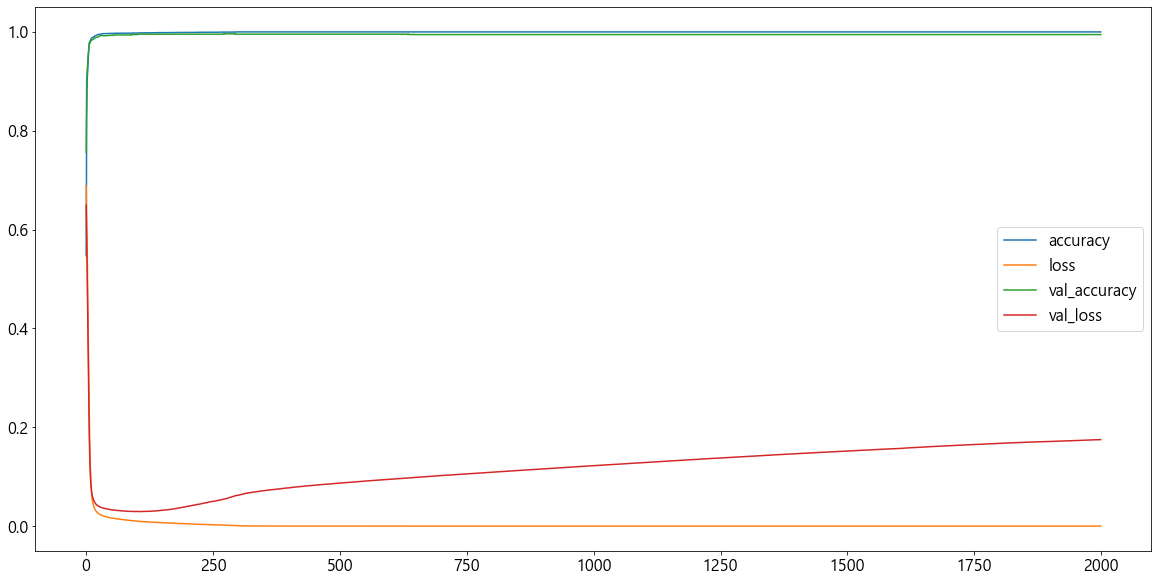

In [13]:
# 오차 정도와 정확도를 그래프로 그린다.
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
